# Labaratuarda numune karışımı
Adınız:Metin Can
Soyadınız:Nasıf
Okul Numaranız:2212721017
GitHub Repo Bağlantısı: https://github.com/metheen/genetik_optimizasyonu

x1: 59.4523
x2: 40.5265
Max Score: 1847.6060
Total Sum: 99.9788


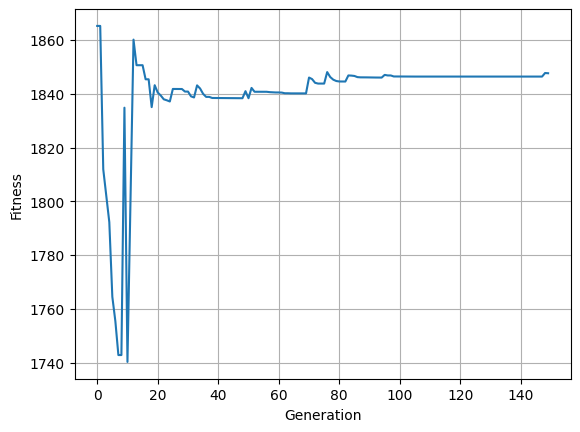

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

POPULATION_SIZE = 50
GENERATIONS = 150
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.8
BOUNDS = [(10, 80), (10, 80)]

def fitness_function(individual):
    x1 = individual[0]
    x2 = individual[1]

    if x1 < 25:
        return -9999

    if (x1 + x2) > 100:
        return -9999

    score = 3*x1 + 2*x2 + (x1 * x2) - (0.5 * (x2**2))
    return score

def create_individual():
    x1 = random.uniform(BOUNDS[0][0], BOUNDS[0][1])
    x2 = random.uniform(BOUNDS[1][0], BOUNDS[1][1])
    return [x1, x2]

def create_population(size):
    return [create_individual() for _ in range(size)]

def selection(population):
    tournament = random.sample(population, 2)
    if fitness_function(tournament[0]) > fitness_function(tournament[1]):
        return tournament[0]
    else:
        return tournament[1]

def crossover(parent1, parent2):
    if random.random() < CROSSOVER_RATE:
        alpha = random.random()
        child1_x1 = alpha * parent1[0] + (1-alpha) * parent2[0]
        child1_x2 = alpha * parent1[1] + (1-alpha) * parent2[1]

        child2_x1 = (1-alpha) * parent1[0] + alpha * parent2[0]
        child2_x2 = (1-alpha) * parent1[1] + alpha * parent2[1]

        return [child1_x1, child1_x2], [child2_x1, child2_x2]
    return parent1, parent2

def mutation(individual):
    if random.random() < MUTATION_RATE:
        gene_idx = random.randint(0, 1)
        change = random.gauss(0, 5)
        individual[gene_idx] += change
        individual[gene_idx] = max(BOUNDS[gene_idx][0], min(BOUNDS[gene_idx][1], individual[gene_idx]))
    return individual

population = create_population(POPULATION_SIZE)
best_fitness_history = []

for generation in range(GENERATIONS):
    new_population = []

    while len(new_population) < POPULATION_SIZE:
        p1 = selection(population)
        p2 = selection(population)
        c1, c2 = crossover(p1, p2)
        new_population.append(mutation(c1))
        if len(new_population) < POPULATION_SIZE:
            new_population.append(mutation(c2))

    population = new_population
    best_ind = max(population, key=fitness_function)
    best_fitness_history.append(fitness_function(best_ind))

best_overall = max(population, key=fitness_function)

print(f"x1: {best_overall[0]:.4f}")
print(f"x2: {best_overall[1]:.4f}")
print(f"Max Score: {fitness_function(best_overall):.4f}")
print(f"Total Sum: {best_overall[0] + best_overall[1]:.4f}")

plt.plot(best_fitness_history)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.grid(True)
plt.show()